In [1]:
import pandas as pd

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/dnacapitalsdev/python/main/titanic.csv")

In [9]:
df.head(10)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
5,0,3,male,27.0,0,0,8.4583
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708


In [10]:
df.tail()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
882,0,2,male,27.0,0,0,13.00
883,1,1,female,19.0,0,0,30.00
884,0,3,female,7.0,1,2,23.45
885,1,1,male,26.0,0,0,30.00
886,0,3,male,32.0,0,0,7.75


In [ ]:
df.shape

(887, 7)

In [ ]:
df.describe()

In [ ]:
data_train =df.sample(frac=0.8, random_state = 786)

In [ ]:
data_train.shape

(710, 7)

In [ ]:
data_train.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
198,0,2,female,24.0,0,0,13.0000
25,1,3,female,38.0,1,5,31.3875
859,0,3,female,14.0,8,2,69.5500
245,0,3,female,25.0,0,0,7.7750
709,1,1,male,48.0,1,0,52.0000


In [ ]:
data_test = df.drop(data_train.index)


In [ ]:
from pycaret.clustering import *

In [ ]:
clust =setup(data = data_train,normalize = True,ignore_features=["Sex"],session_id=123)

,Description,Value
0,session_id,123
1,Original Data,"(710, 7)"
2,Missing Values,False
3,Numeric Features,2
4,Categorical Features,4
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(710, 21)"
9,CPU Jobs,-1


In [ ]:
kmeans = create_model("kmeans")

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2625,192.3904,1.3437,0,0,0


In [ ]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


In [ ]:
kmeans_result = assign_model(kmeans)

In [ ]:
kmeans_result.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Cluster
198,0,2,female,24.0,0,0,13.0000,Cluster 0
25,1,3,female,38.0,1,5,31.3875,Cluster 1
859,0,3,female,14.0,8,2,69.5500,Cluster 1
245,0,3,female,25.0,0,0,7.7750,Cluster 0
709,1,1,male,48.0,1,0,52.0000,Cluster 2


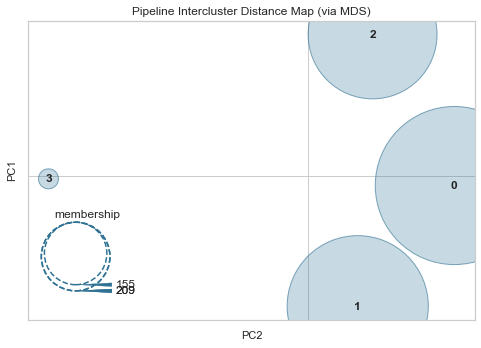

In [ ]:
plot_model(kmeans,plot='distance')

In [ ]:
save_model(kmeans, 'mykmeans')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['Pclass'], id_columns=[],
                                       ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numeri...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 

In [ ]:
pred_kmeans = predict_model(kmeans,data=data_train)

In [ ]:
pred_kmeans.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Cluster
198,0,2,female,24.0,0,0,13.0000,Cluster 0
25,1,3,female,38.0,1,5,31.3875,Cluster 1
859,0,3,female,14.0,8,2,69.5500,Cluster 1
245,0,3,female,25.0,0,0,7.7750,Cluster 0
709,1,1,male,48.0,1,0,52.0000,Cluster 2


In [ ]:
dt_kmeans = load_model('mykmeans')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
pred_kmeans2 =predict_model(dt_kmeans,data=data_train)

In [ ]:
pred_kmeans2.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Cluster
198,0,2,female,24.0,0,0,13.0000,Cluster 0
25,1,3,female,38.0,1,5,31.3875,Cluster 1
859,0,3,female,14.0,8,2,69.5500,Cluster 1
245,0,3,female,25.0,0,0,7.7750,Cluster 0
709,1,1,male,48.0,1,0,52.0000,Cluster 2


In [ ]:
# after you train the model, you can train again using transactional data & then export
#once exported to csv, open the same file in power bi. Now cluster column is there




In [ ]:
pred_kmeans.to_csv("mykmeans_result.csv")

NameError: name 'pred_kmeans' is not defined